In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

In [2]:
folders = glob.glob("../data/00_gaze_data/sub*")
folders.sort()
subjs = []
for f in folders:
    subjs.append(f[-6:])
print(len(subjs))    
subjs[:3]

condition_index = ['count trash']*20 + ['free viewing']*20
condition_index[:3]

40


['count trash', 'count trash', 'count trash']

In [3]:
list_of_dataframes = []

for i in range(len(subjs)): #use the first 20 subjs 1-20 -- condition1
    read_file_name = '../data/03_fixation_billboards_recall_recognition/'  + subjs[i] +'_fixations_billboards_recall_recognition.csv'
    df = pd.read_csv(read_file_name, index_col = 0)
    df['subject'] = subjs[i]
    df["condition"] = condition_index[i]
    list_of_dataframes.append(df)
    
large_df = pd.concat(list_of_dataframes)
large_df.tail()

,position_index,billboard_image_at_position_text,fix_bill,recall,recognition,subject,condition
15,16,furniture,2.0,0,1,sub040,free viewing
16,17,pizza,1.0,0,1,sub040,free viewing
17,18,smartphone,1.0,0,1,sub040,free viewing
18,19,texting_driving,2.0,0,0,sub040,free viewing
19,20,lawyer,2.0,0,1,sub040,free viewing


In [4]:
large_df['fix_binarized'] = large_df['fix_bill']
#large_df.iloc[large_df['fix_binarized']>2] = 2

large_df.loc[large_df['fix_binarized'] > 1, 'fix_binarized'] = 1
#large_df.loc[large_df['fix_binarized'] > 3, 'fix_binarized'] = 3

large_df.head()

#for saving
#large_df.to_csv('../data/04_statistics/csv/billboard_fixations_recall_recognition_df.csv')

,position_index,billboard_image_at_position_text,fix_bill,recall,recognition,subject,condition,fix_binarized
0,1,texting_driving,2.0,0,1,sub001,count trash,1.0
1,2,burger,1.0,0,0,sub001,count trash,1.0
2,3,drunk_driving,1.0,0,0,sub001,count trash,1.0
3,4,coffee,1.0,0,0,sub001,count trash,1.0
4,5,hotel,1.0,0,0,sub001,count trash,1.0


(0.0, 4.0)

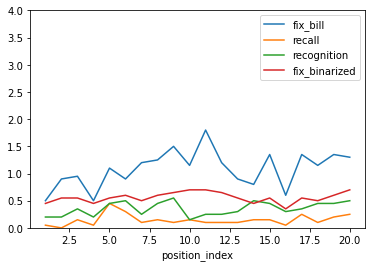

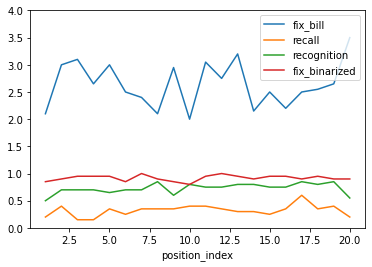

In [5]:
large_df.head()
by_pos_df = large_df[large_df['condition']=='count trash'].groupby('position_index').mean()
by_pos_df.plot()
plt.ylim([0,4])

by_pos_df = large_df[large_df['condition']=='free viewing'].groupby('position_index').mean()
by_pos_df.plot()
plt.ylim([0,4])

In [6]:
by_subject_df = large_df.groupby('subject').sum()
by_subject_df["condition"] = condition_index
by_subject_df = by_subject_df.drop(columns = "fix_binarized")
by_subject_df['recall_rate'] = by_subject_df['recall']/20 
by_subject_df['recognition_rate'] = by_subject_df['recognition']/20 

#commenting out saving
#by_subject_df.to_csv('../data/04_statistics/csv/billboard_fixations_recall_recognition_df_by_subjects.csv')
by_subject_df.head()

,position_index,fix_bill,recall,recognition,condition,recall_rate,recognition_rate
subject,,,,,,,
sub001,210,32.0,4,14,count trash,0.20,0.70
sub002,210,45.0,6,11,count trash,0.30,0.55
sub003,210,13.0,4,3,count trash,0.20,0.15
sub004,210,19.0,2,5,count trash,0.10,0.25
sub005,210,3.0,1,7,count trash,0.05,0.35


In [7]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'count trash'].fix_bill.values,
             by_subject_df[by_subject_df['condition'] == 'count trash'].recall.values)[0,1]

0.730930328342208

In [8]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'free viewing'].fix_bill.values,
             by_subject_df[by_subject_df['condition'] == 'free viewing'].recall.values)[0,1]

-0.2764210651158292

In [9]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'count trash'].fix_bill.values,
             by_subject_df[by_subject_df['condition'] == 'count trash'].recognition.values)[0,1]

0.7515534811231358

In [10]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'free viewing'].fix_bill.values,
             by_subject_df[by_subject_df['condition'] == 'free viewing'].recognition.values)[0,1]

-0.10861052172651191

In [11]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'count trash'].recall.values,
             by_subject_df[by_subject_df['condition'] == 'count trash'].recognition.values)[0,1]

0.5361892446295434

In [12]:
np.corrcoef( by_subject_df[by_subject_df['condition'] == 'free viewing'].recall.values,
             by_subject_df[by_subject_df['condition'] == 'free viewing'].recognition.values)[0,1]

0.1961250992837777

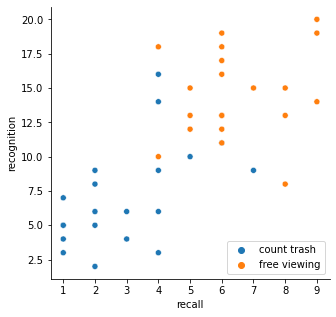

In [13]:
fig, ax = plt.subplots(1, figsize=(5,5))

sns.scatterplot(x   = by_subject_df.recall, 
                y   = by_subject_df.recognition,
                hue = by_subject_df.condition,
                #alpha=0.35,
                )

#plt.xticks([0, 100], ['not looked at', 'looked at'])
#plt.xlabel('BILLBOARD FIXATIONS');

#plt.ylim([0, 10],)
plt.legend(loc = 4)
#plt.ylabel('FREE RECALL');

sns.despine()

In [14]:
by_subject_by_fixbin_df = large_df.groupby(['subject', 'fix_binarized']).count()
by_subject_by_fixbin_df

position_index  billboard_image_at_position_text  \
subject fix_binarized                                                     
sub001  1.0                        20                                20   
sub002  0.0                         1                                 1   
        1.0                        19                                19   
sub003  0.0                        11                                11   
        1.0                         9                                 9   
...                               ...                               ...   
sub038  0.0                         1                                 1   
        1.0                        19                                19   
sub039  0.0                         2                                 2   
        1.0                        18                                18   
sub040  1.0                        20                                20   

                       fix_bill  recall  recognition  condition  
subject fix_binarized                                            
sub001  1.0                  20      20           20         20  
sub002  0.0                   1       1            1          1  
        1.0                  19      19           19         19  
sub003  0.0                  11      11           11         11  
        1.0                   9       9            9          9  
...                         ...     ...          ...        ...  
sub038  0.0                   1       1            1          1  
        1.0                  19      19           19         19  
sub039  0.0                   2       2            2          2  
        1.0                  18      18           18         18  
sub040  1.0                  20      20           20         20  

[67 rows x 6 columns]

### Plot

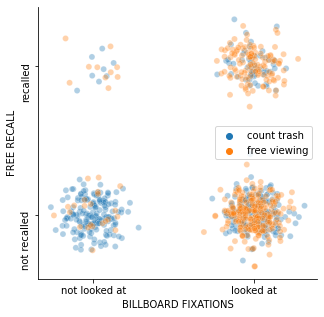

In [15]:
# list with ordered categories
fig, ax = plt.subplots(1, figsize=(5,5))

sns.scatterplot(x = jitter(large_df.fix_binarized,0), 
                y = jitter(large_df.recall,0),
                hue = large_df.condition,
                alpha=0.35,
                );
plt.legend(loc='right');

plt.xticks([0, 1], ['not looked at', 'looked at'])
plt.xlabel('BILLBOARD FIXATIONS');

plt.yticks([0, 1], ['not recalled', 'recalled'])
plt.yticks(rotation=90)
plt.ylabel('FREE RECALL');

sns.despine()

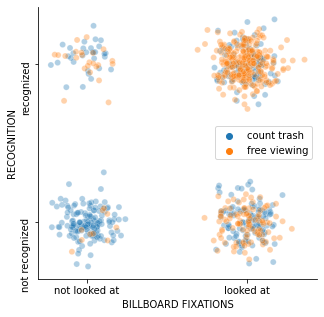

In [16]:
# list with ordered categories
fig, ax = plt.subplots(1, figsize=(5,5))

sns.scatterplot(x = jitter(large_df.fix_binarized,0), 
                y = jitter(large_df.recognition,0),
                hue = large_df.condition,
                alpha=0.35,
                );
plt.legend(loc='right');

plt.xticks([0, 1], ['not looked at', 'looked at'])
plt.xlabel('BILLBOARD FIXATIONS');

plt.yticks([0, 1], ['not recognized', 'recognized'])
plt.yticks(rotation=90)
plt.ylabel('RECOGNITION');

sns.despine()